# Predicting car prices in Kenya with data collected from Jiji.co.ke

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1= pd.read_csv('general_car_data.csv')
df1.head()

C:\Users\Brian\AppData\Local\Temp\ipykernel_896\3609153498.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv('general_car_data.csv')


,Unnamed: 0,Condition,Make,Body,Fuel,Second Condition,Registered Car,Model,Exchange Possible,Seats,...,region_name,count_images,count_views,id_y,description,boost,min_est,max_est,paid_infor,avg_est
0,0,Kenyan Used,Toyota,NaN,NaN,"['Original parts', 'Unpainted', 'No faults']",Yes,Crown,['No'],NaN,...,Kilimani,5.0,125.0,10593924.0,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1400000.0,1450000.0,Sponsored,1425000.0
1,1,Foreign Used,Mazda,NaN,NaN,['No faults'],NaN,CX-5,NaN,NaN,...,Kilimani,8.0,36.0,10717151.0,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2500000.0,2650000.0,Sponsored,2575000.0
2,2,Foreign Used,Mazda,NaN,NaN,['No faults'],Yes,Demio,NaN,NaN,...,Ridgeways,6.0,314.0,10417467.0,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1080000.0,1100000.0,Sponsored,1090000.0
3,3,Kenyan Used,Mazda,NaN,NaN,"['No faults', 'Original parts']",Yes,CX-5,NaN,NaN,...,Langata,9.0,87.0,10754171.0,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,NaN
4,4,Foreign Used,Peugeot,NaN,NaN,['No faults'],No,508,['Yes'],NaN,...,Nairobi Central,17.0,2344.0,7115429.0,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,NaN


In [3]:
df1.columns

Index(['Unnamed: 0', 'Condition', 'Make', 'Body', 'Fuel', 'Second Condition',
       'Registered Car', 'Model', 'Exchange Possible', 'Seats',
       'Year of Manufacture', 'Color', 'Transmission', 'Mileage',
       'price_valuation_txt', 'price_estimate', 'selling_price', 'advert_id',
       'id_x', 'name', 'date_created_x', 'phone', 'page_url', 'adverts_count',
       'status', 'date_created_y', 'date_moderated', 'date_edited',
       'paid_info', 'region_name', 'count_images', 'count_views', 'id_y',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor', 'avg_est'],
      dtype='object')

In [4]:
# Creat a new column called Age:
df1['Age']= df1['Year of Manufacture'].apply(lambda x: (2022-int(x)) if pd.notna(x)  else x)

### Select features that can be used in training

In [5]:
selected_cols= ['Condition', 'Make','Model','Age','Transmission','Mileage', 'selling_price', 'Color','Registered Car','region_name', 'min_est', 'max_est']

In [6]:
df2= df1[selected_cols]
df2.head(5)

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,min_est,max_est
0,Kenyan Used,Toyota,Crown,10.0,Automatic,NaN,1270000.0,White,Yes,Kilimani,1400000.0,1450000.0
1,Foreign Used,Mazda,CX-5,6.0,Automatic,74000.0,2750000.0,White,NaN,Kilimani,2500000.0,2650000.0
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways,1080000.0,1100000.0
3,Kenyan Used,Mazda,CX-5,9.0,AMT,92929.0,1720000.0,Black,Yes,Langata,NaN,NaN
4,Foreign Used,Peugeot,508,8.0,Automatic,91000.0,1999000.0,Black,No,Nairobi Central,NaN,NaN


### Clean data & Drop nulls

In [7]:
df2.isnull().sum()

Condition          109
Make               109
Model              109
Age                109
Transmission        19
Mileage           5349
selling_price       18
Color               22
Registered Car    2482
region_name         18
min_est           3176
max_est           3177
dtype: int64

In [8]:
# For this drop all the nulls - We can modify this later to avoud dropping nulls but substitute.
df3 = df2.dropna()

In [9]:
df3.head()

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,min_est,max_est
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways,1080000.0,1100000.0
8,Kenyan Used,Honda,Fit,8.0,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central,954500.0,990000.0
10,Foreign Used,Nissan,X-Trail,7.0,Automatic,87000.0,2500000.0,Black,Yes,Kilimani,2350000.0,2400000.0
11,Kenyan Used,Volkswagen,Touareg,11.0,Automatic,114500.0,2990000.0,Silver,Yes,Ridgeways,3200000.0,3250000.0
12,Foreign Used,Toyota,Vitz,8.0,Automatic,76000.0,885000.0,Purple,Yes,Ridgeways,940000.0,970000.0


## Feature Engineering

#### New feature, mileage/year

In [10]:
df4= df3.copy()

In [11]:
def get_mpy(mil, age):
    if age>0:
        return mil/age
    else:
        return mil

In [12]:
df4['mpy'] = df4.apply(lambda x: get_mpy(x.Mileage, x.Age), axis=1)
df4.head()


,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,min_est,max_est,mpy
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways,1080000.0,1100000.0,16714.285714
8,Kenyan Used,Honda,Fit,8.0,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central,954500.0,990000.0,14625.000000
10,Foreign Used,Nissan,X-Trail,7.0,Automatic,87000.0,2500000.0,Black,Yes,Kilimani,2350000.0,2400000.0,12428.571429
11,Kenyan Used,Volkswagen,Touareg,11.0,Automatic,114500.0,2990000.0,Silver,Yes,Ridgeways,3200000.0,3250000.0,10409.090909
12,Foreign Used,Toyota,Vitz,8.0,Automatic,76000.0,885000.0,Purple,Yes,Ridgeways,940000.0,970000.0,9500.000000


### Create new features based on Mean of categorical

In [13]:
df4_me = df4.copy()

In [14]:
# df4_me.columns
encode_feat = ['Condition', 'Make', 'Model','Transmission','Color', 'Registered Car']

In [15]:
def mean_encode(cat_feature):
    new_feature = 'ME_'+ cat_feature
    me_map = df4_me.groupby([cat_feature])['selling_price'].mean().to_dict()
    df4_me[new_feature] =  df4_me[cat_feature].map(me_map)
    df4_me.head()

In [16]:
for feat in encode_feat:
    mean_encode(feat)
df4_me.head()

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,min_est,max_est,mpy,ME_Condition,ME_Make,ME_Model,ME_Transmission,ME_Color,ME_Registered Car
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways,1080000.0,1100000.0,16714.285714,2.330578e+06,2.138480e+06,2.231826e+06,2.320539e+06,2.389948e+06,2.323915e+06
8,Kenyan Used,Honda,Fit,8.0,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central,954500.0,990000.0,14625.000000,2.355062e+06,2.211477e+06,2.108775e+06,2.320539e+06,2.389948e+06,2.323915e+06
10,Foreign Used,Nissan,X-Trail,7.0,Automatic,87000.0,2500000.0,Black,Yes,Kilimani,2350000.0,2400000.0,12428.571429,2.330578e+06,2.326857e+06,2.251762e+06,2.320539e+06,2.366786e+06,2.323915e+06
11,Kenyan Used,Volkswagen,Touareg,11.0,Automatic,114500.0,2990000.0,Silver,Yes,Ridgeways,3200000.0,3250000.0,10409.090909,2.355062e+06,2.396108e+06,2.481588e+06,2.320539e+06,2.389948e+06,2.323915e+06
12,Foreign Used,Toyota,Vitz,8.0,Automatic,76000.0,885000.0,Purple,Yes,Ridgeways,940000.0,970000.0,9500.000000,2.330578e+06,2.365169e+06,2.150929e+06,2.320539e+06,2.262424e+06,2.323915e+06


## Dimensionality reduction

### Explore cat variables for dimension reduction

In [280]:
df5 = df4_me.copy()

In [281]:
(df5.Model.value_counts()>10).sum()

116

#### For the categorical variables: Make, Model, Color, & Region name, pick only those above 10 counts, create Other for the rest

In [282]:
# Function to create  a new feature category for counts less than 10
def create_other(df, feature):
    stats = df[feature].value_counts(ascending=False)
    stats_less_than_10 = stats[stats<=10]
    stats_less_than_10
    df[feature] = df[feature].apply(lambda x: 'other' if x in stats_less_than_10 else x)
    

In [283]:
# df5.columns
features = ['Make', 'Model','Color','region_name']

In [284]:
for feat in features:
    create_other(df5, feat)

# Outlier Removal

### Outlier removal using standard deviation & Mean

In [285]:
df6 = df5.copy()

In [286]:
df6.describe()

,Age,Mileage,selling_price,min_est,max_est,mpy,ME_Condition,ME_Make,ME_Model,ME_Transmission,ME_Color,ME_Registered Car
count,9171.000000,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03,9171.000000,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03
mean,8.525788,8.917752e+04,2.335646e+06,2.247265e+06,2.371759e+06,10611.071451,2.335646e+06,2.335646e+06,2.335646e+06,2.335646e+06,2.335646e+06,2.335646e+06
std,3.012020,7.022151e+04,2.015516e+06,1.899232e+06,2.016329e+06,7666.240123,1.535598e+04,1.865995e+05,4.481224e+05,6.388392e+04,9.418981e+04,1.749763e+04
min,0.000000,0.000000e+00,2.150000e+05,2.530000e+05,2.900000e+05,0.000000,2.203062e+06,1.275000e+06,6.500000e+05,2.320539e+06,1.756222e+06,2.323915e+06
25%,7.000000,6.000000e+04,1.150000e+06,1.100000e+06,1.150000e+06,7833.142857,2.330578e+06,2.326857e+06,2.150929e+06,2.320539e+06,2.281798e+06,2.323915e+06
50%,8.000000,7.980800e+04,1.720000e+06,1.680000e+06,1.750000e+06,9750.000000,2.330578e+06,2.365169e+06,2.302213e+06,2.320539e+06,2.342603e+06,2.323915e+06
75%,8.000000,1.020000e+05,2.700000e+06,2.600000e+06,2.780000e+06,12123.600000,2.330578e+06,2.365169e+06,2.527000e+06,2.320539e+06,2.366786e+06,2.361743e+06
max,61.000000,1.980000e+06,1.850000e+07,1.699000e+07,1.753000e+07,177142.857143,2.355062e+06,1.250000e+07,1.690000e+07,2.665225e+06,2.629094e+06,2.361743e+06


In [287]:
df6.shape

(9171, 19)

In [288]:
models= df6.groupby('Model')

In [289]:
# models.agg(Mean = ('selling_price', np.mean), Std= ('selling_price', np.std) )

In [290]:
# for key, subdf in models:
#     print(subdf.selling_price)

In [291]:
def remove_pps_outliers(df, feature):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Model'):
        m = np.mean(subdf[feature])
        st = np.std(subdf[feature])
        reduced_df = subdf[(subdf[feature]>(m-st)) & (subdf[feature]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [292]:
df7 = remove_pps_outliers(df6, 'selling_price')
df7.shape

(8001, 19)

In [293]:
df8 = remove_pps_outliers(df7, 'mpy')
df8.shape

(6506, 19)

In [294]:
df9 = remove_pps_outliers(df8, 'Age')
df9.shape

(5165, 19)

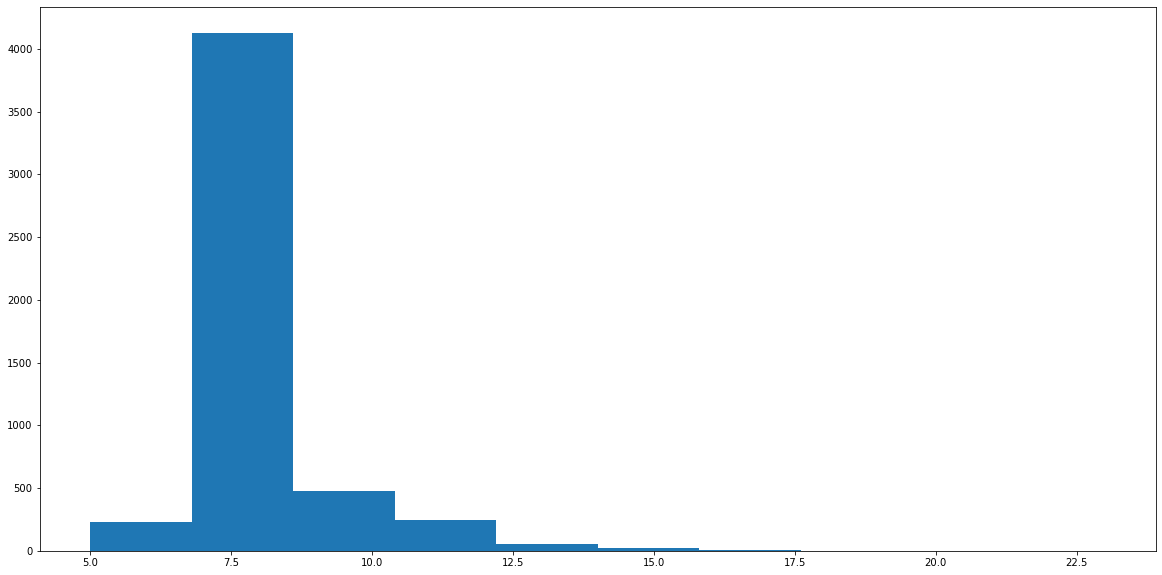

In [295]:
plt.hist(df9.Age)
plt.show()

In [296]:
df8.head()

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,min_est,max_est,mpy,ME_Condition,ME_Make,ME_Model,ME_Transmission,ME_Color,ME_Registered Car
0,Foreign Used,BMW,116i,6.0,Automatic,62000.0,3100000.0,White,Yes,Kilimani,3000000.0,3300000.0,10333.333333,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.342603e+06,2.323915e+06
1,Foreign Used,BMW,116i,7.0,Automatic,58000.0,1670000.0,Red,Yes,Mombasa CBD,1650000.0,1700000.0,8285.714286,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.274263e+06,2.323915e+06
2,Foreign Used,BMW,116i,7.0,Automatic,64000.0,980000.0,White,No,Mombasa CBD,1080000.0,1100000.0,9142.857143,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.342603e+06,2.361743e+06
3,Foreign Used,BMW,116i,8.0,Automatic,75000.0,970000.0,Red,No,Mombasa CBD,1010000.0,1050000.0,9375.000000,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.274263e+06,2.361743e+06
4,Foreign Used,BMW,116i,8.0,Automatic,69000.0,3000000.0,Black,No,Mombasa CBD,2800000.0,2900000.0,8625.000000,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.366786e+06,2.361743e+06


In [297]:
df8.corr()

,Age,Mileage,selling_price,min_est,max_est,mpy,ME_Condition,ME_Make,ME_Model,ME_Transmission,ME_Color,ME_Registered Car
Age,1.000000,0.735182,-0.001814,-0.003461,-0.001752,-0.094614,0.482940,0.069324,0.016743,0.152123,0.058470,-0.261388
Mileage,0.735182,1.000000,0.000187,-0.002229,-0.002074,0.566190,0.460912,0.027776,0.018704,0.197792,0.071219,-0.272433
selling_price,-0.001814,0.000187,1.000000,0.961136,0.959065,0.008285,-0.008581,0.048660,0.134115,0.027000,0.018594,0.010444
min_est,-0.003461,-0.002229,0.961136,1.000000,0.996068,0.004799,-0.004430,0.047398,0.129380,0.017446,0.018926,0.006457
max_est,-0.001752,-0.002074,0.959065,0.996068,1.000000,0.001740,-0.004873,0.047889,0.130585,0.018668,0.020002,0.006417
mpy,-0.094614,0.566190,0.008285,0.004799,0.001740,1.000000,0.082457,-0.027635,-0.001236,0.118206,0.032122,-0.081524
ME_Condition,0.482940,0.460912,-0.008581,-0.004430,-0.004873,0.082457,1.000000,0.063512,0.021851,0.122657,0.051088,-0.297623
ME_Make,0.069324,0.027776,0.048660,0.047398,0.047889,-0.027635,0.063512,1.000000,0.339199,0.020107,0.062112,-0.025322
ME_Model,0.016743,0.018704,0.134115,0.129380,0.130585,-0.001236,0.021851,0.339199,1.000000,0.084121,0.063191,0.020746
ME_Transmission,0.152123,0.197792,0.027000,0.017446,0.018668,0.118206,0.122657,0.020107,0.084121,1.000000,0.011107,-0.089438


# Drop columns to not use in Training

In [423]:
#drop mpy:
cols_to_drop= ['mpy',  'min_est','region_name', 'max_est']
# cols_to_drop= ['mpy', 'region_name', 'min_est', 'max_est','Condition', 'Make', 'Model', 'Transmission','Color', 'Registered Car']

df9 = df8.drop(cols_to_drop, axis=1)
# df10 = df9.copy()

In [424]:
# Test for specific model:
# filt = (df9['Model']=='Harrier')
# df9 =df9.loc[filt]

## One hot encoding

In [425]:
# Fields to encode:
cat_features = ['Condition', 'Make', 'Model','Transmission', 'Color', 'Registered Car']

In [426]:
dummies = pd.get_dummies(df9, columns=cat_features,  drop_first=True)

In [427]:
df10 = dummies.copy()

In [428]:
df10.shape

(6506, 170)

# Building a Model

In [429]:
X = df10.drop('selling_price', axis=1)

In [430]:
X.head()

,Age,Mileage,ME_Condition,ME_Make,ME_Model,ME_Transmission,ME_Color,ME_Registered Car,Condition_Foreign Used,Condition_Kenyan Used,...,Color_Other,Color_Pearl,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_White,Color_Yellow,Registered Car_Yes
0,6.0,62000.0,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.342603e+06,2.323915e+06,1,0,...,0,0,0,0,0,0,0,1,0,1
1,7.0,58000.0,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.274263e+06,2.323915e+06,1,0,...,0,0,0,0,1,0,0,0,0,1
2,7.0,64000.0,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.342603e+06,2.361743e+06,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.0,75000.0,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.274263e+06,2.361743e+06,1,0,...,0,0,0,0,1,0,0,0,0,0
4,8.0,69000.0,2.330578e+06,2.412163e+06,2.054865e+06,2.320539e+06,2.366786e+06,2.361743e+06,1,0,...,0,0,0,0,0,0,0,0,0,0


In [431]:
y = df10.selling_price
y.shape

(6506,)

### Split training & test data

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Define my own scoring fomular

In [433]:
def get_score(pred, test):
    df_r = pd.DataFrame({'pred':pred,'test':test})
    df_r['error'] = abs((df_r['pred']-df_r['test'])/df_r['test'])*100
    return df_r.error.mean()

### Linear Model

In [434]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-0.019161619783220285

In [435]:
lr_pred = lr_clf.predict(X_test)
get_score(lr_pred, y_test)

49.59426822081231

### Decision Tree

In [436]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_features=None)
dt.fit(X_train, y_train)
dt.score(X_test,y_test)

-0.9294485227248526

### SVM reg

In [437]:
from sklearn import svm
sv = svm.SVR()
sv.fit(X_train, y_train)
sv.score(X_test,y_test)

-0.0633896674696448

### Voting reg

In [438]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
# X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, learning_rate=0.001, n_estimators=100, subsample=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)
ereg.score(X_test, y_test)

-0.026680588529364835

### Random forest

In [439]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs=10)
rf_reg.fit(X_train, y_train) 
rf_reg.score(X_test,y_test)

-0.24267772566359636

### Elastic Net

In [440]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
en = ElasticNet(random_state=10, alpha=1, fit_intercept=True)
en.fit(X_train, y_train)

en_pred = en.predict(X_test)
# mean_squared_error(y_test, en_pred, squared=True)
print(en.score(X_test, y_test), get_score(en_pred, y_test))

0.009588475013537212 49.2737039930576


### ElasticNetCV 

In [441]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
encv = ElasticNetCV(cv=50, random_state=0, eps=10, n_alphas=10)
encv.fit(X, y)
encv_pred = encv.predict(X_test)
print(encv.score(X_test, y_test), get_score(encv_pred, y_test))

-9.028651431841617e-05 49.3720762161246


### Bayesian Ridge

In [442]:
from sklearn import linear_model
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)
br.score(X_test, y_test)

0.009910059627070478

### SGDRegressor

In [420]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sr = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, warm_start=True, average=True))
sr.fit(X_train, y_train)
sr.score(X_test, y_test)


-0.2103635491062139

### Gradient Boost regressor

In [421]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=10, learning_rate=0.001, n_estimators=100, subsample=1)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

-0.01304239925043782

### Using k fold cross validation to measure accuracy of the linear model

In [422]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-9.78053359e+02, -4.64424164e+00, -6.83107915e-02, -3.25681012e-01,
       -2.28633490e-01])

### Find best model using GridSearchCV

In [161]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,y)

## Feature selection with sklearn f- regessions

In [67]:
from sklearn.feature_selection import f_regression

In [69]:
y.shape

(8015,)

In [71]:
p_values=f_regression(X,y)[1]

In [162]:
# p_values.round(3)

### Feature scaling/ Standadization

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [77]:
scaler.fit(X)

StandardScaler()

In [82]:
x_scaled = scaler.fit_transform(X_train)

In [83]:
rf_reg.fit(x_scaled, y_train) 
rf_reg.score(X_test,y_test)

C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-1.2794492543758436

In [84]:
lr_clf.fit(x_scaled,y_train)


C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-3.236426112189673e+35

In [85]:
x_test_scaled = scaler.fit_transform(X_test)

In [86]:
lr_clf.score(x_test_scaled,y_test)

-4.577395519585258e+21